In [1]:
import ROOT as rt

Welcome to JupyROOT 6.12/06


In [2]:

tree = rt.TChain("rechitntupler/hits", "Hits"); 
tree2 = rt.TChain("trackimpactntupler/impactPoints", "Tracks");

tree.AddFriend(tree2, "tracks");

pattern = "scan3/ntuple_1*"

tree.Add(pattern);
tree2.Add(pattern);

In [3]:
#rt.TProof.Open('workers=4').SetLogLevel(0)
#tree.SetProof()

In [4]:
tree.SetMarkerStyle(7)

In [5]:
tree.SetAlias("rechit_HG","rechit_energyHigh");
tree.SetAlias("rechit_LG","rechit_energyLow");

tree.SetAlias("rechit_id","rechit_channel + 64*rechit_skiroc");

tree.SetAlias("rechit_corry","rechit_y * (-1+2*(rechit_skiroc%2 == 1))");
tree.SetAlias("rechit_corrx","rechit_x * (-1+2*(rechit_skiroc%2 == 1))");

tree.SetAlias("deltaX_tele","rechit_corrx + impactX_HGCal_layer_1");
tree.SetAlias("deltaY_tele","rechit_corry + impactY_HGCal_layer_1");

tree.SetAlias("impactY","(PI_positionY-140 - impactY_HGCal_layer_1)/10. - 0.338");
tree.SetAlias("impactX","(PI_positionX-85  - impactX_HGCal_layer_1)/10.");

tree.SetAlias("deltaX","rechit_corrx - impactX");
tree.SetAlias("deltaY","rechit_corry - impactY");

tree.SetAlias("deltaR","sqrt(deltaX*deltaX + deltaY * deltaY)");

tree.SetAlias("rechit_gainHLG","abs(rechit_energyHigh/rechit_energyLow - 10)");

In [6]:
cutstr = "PI_positionY > 0 ";
cutstr += "&& ntracks == 1 ";
#cutstr += "&& event < 100 ";
cutstr += "&& rechit_layer == 1 && rechit_energy > 0.5 && rechit_energy < 5 && rechit_gainHLG < 5"

In [7]:
canv = rt.TCanvas("canv","c",1000,600);

In [17]:
canv_split.SetCanvasSize(1000,600)

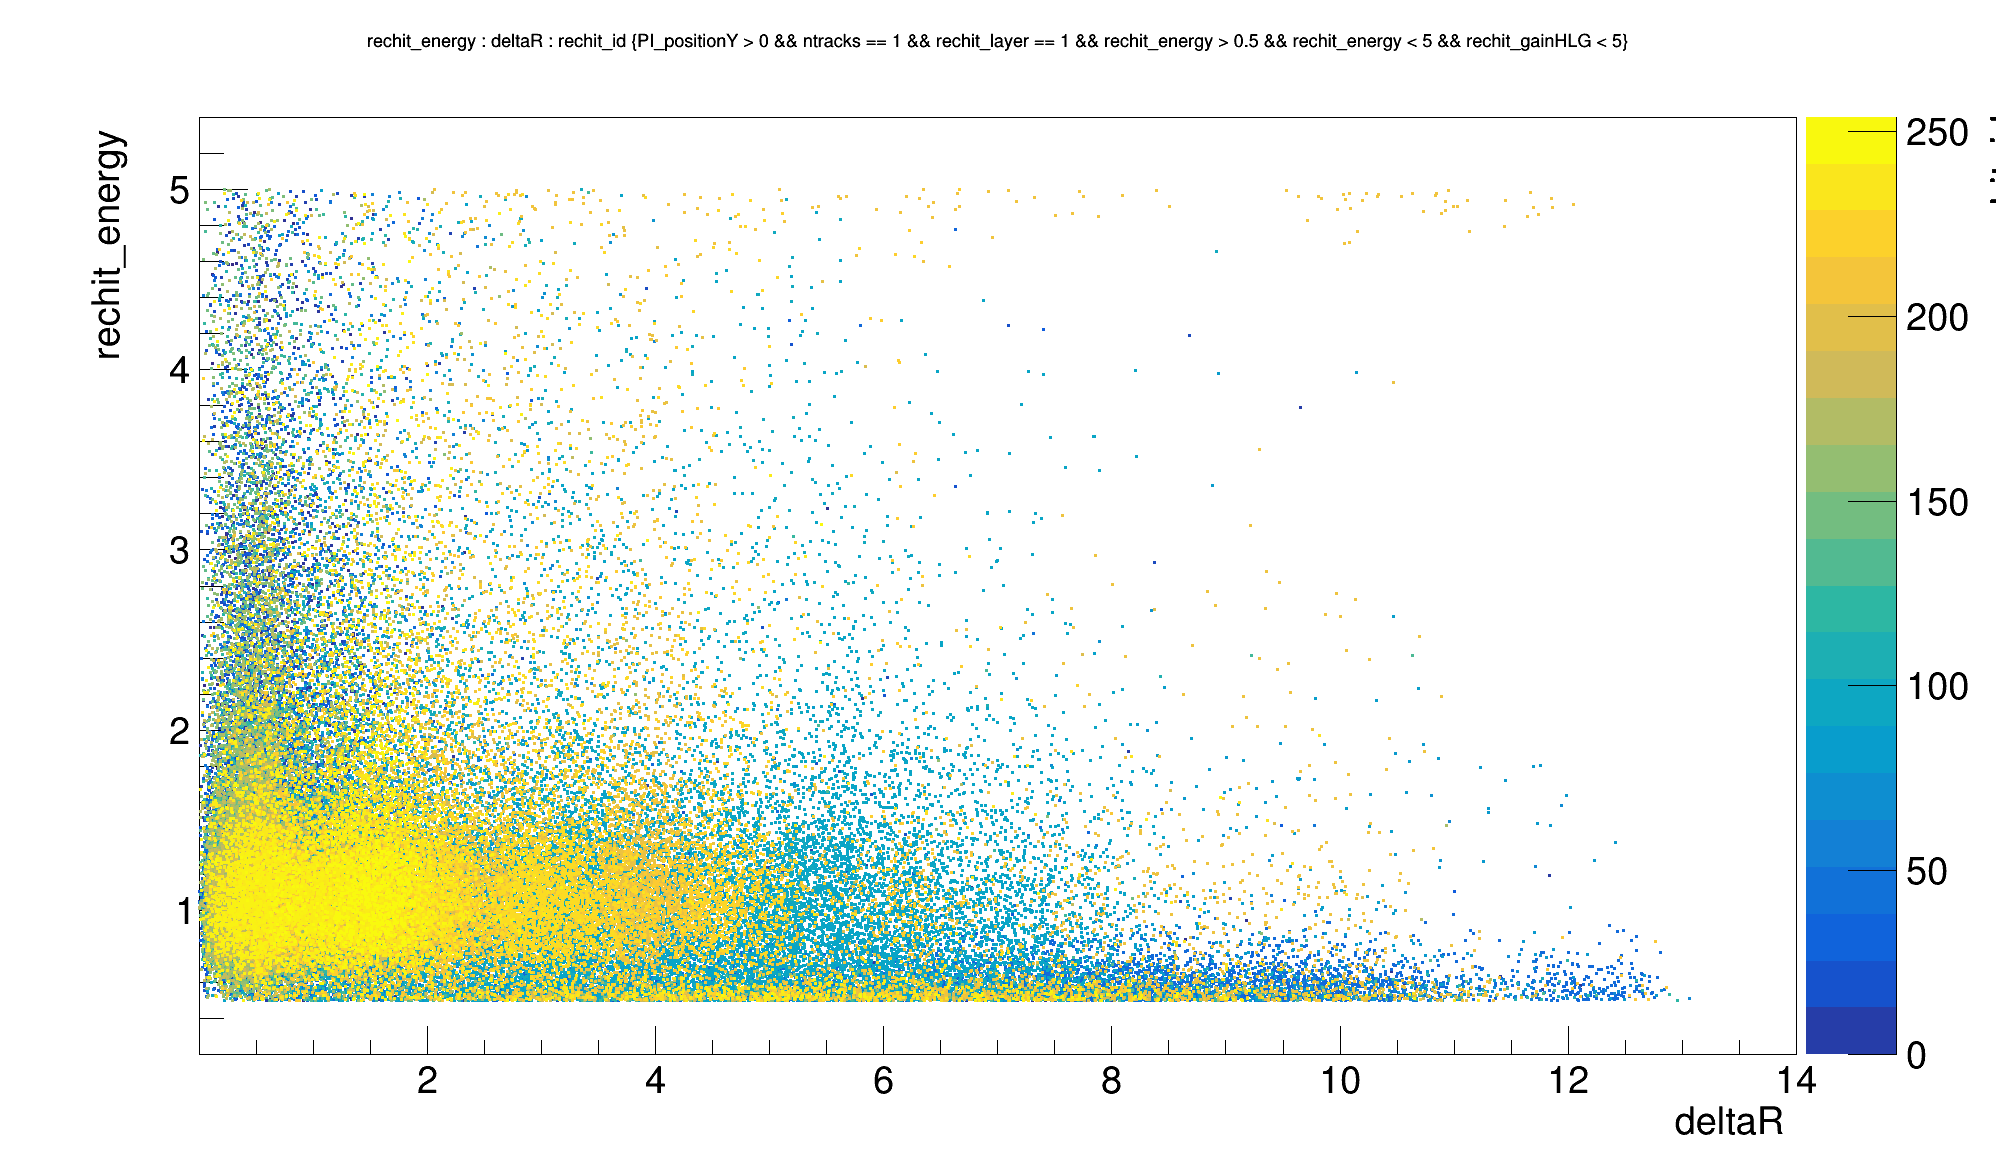

In [10]:
tree.Draw("rechit_energy : deltaR : rechit_id",cutstr,"pcolz");
canv.Draw()

In [12]:
canv_split = rt.TCanvas("canv_split","c",2000,1200);
canv_split.Divide(2,2);

In [13]:
canv_split.SetCanvasSize(2000,1200)

0
1
2
3


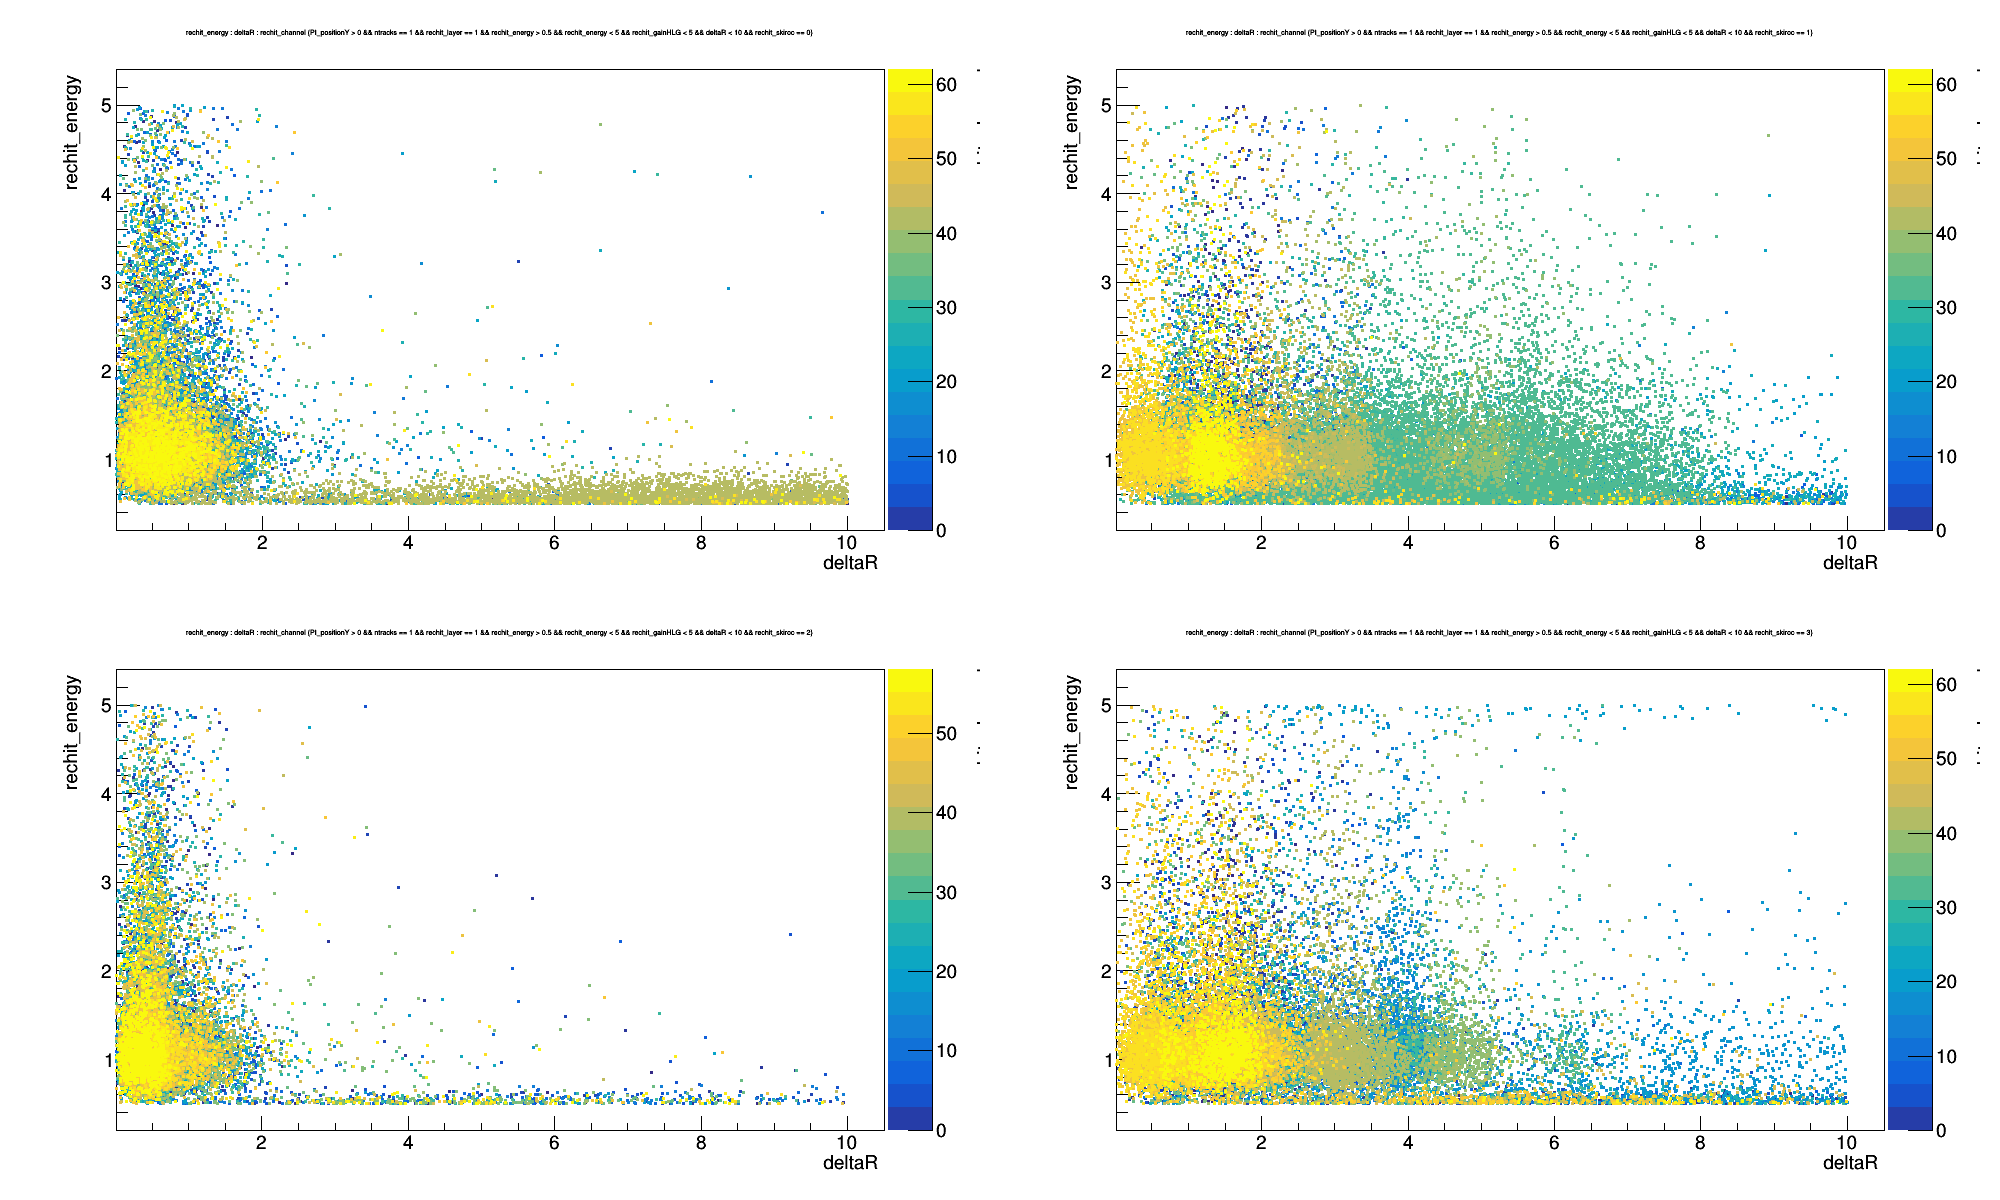

In [14]:
for chip in range(4):
    canv_split.cd(chip+1);
 
    cuts = cutstr + " && deltaR < 10 && rechit_skiroc == %i" %chip;
    print(chip)
    tree.Draw("rechit_energy : deltaR : rechit_channel",cuts,"pcolz");
    
canv_split.Draw()

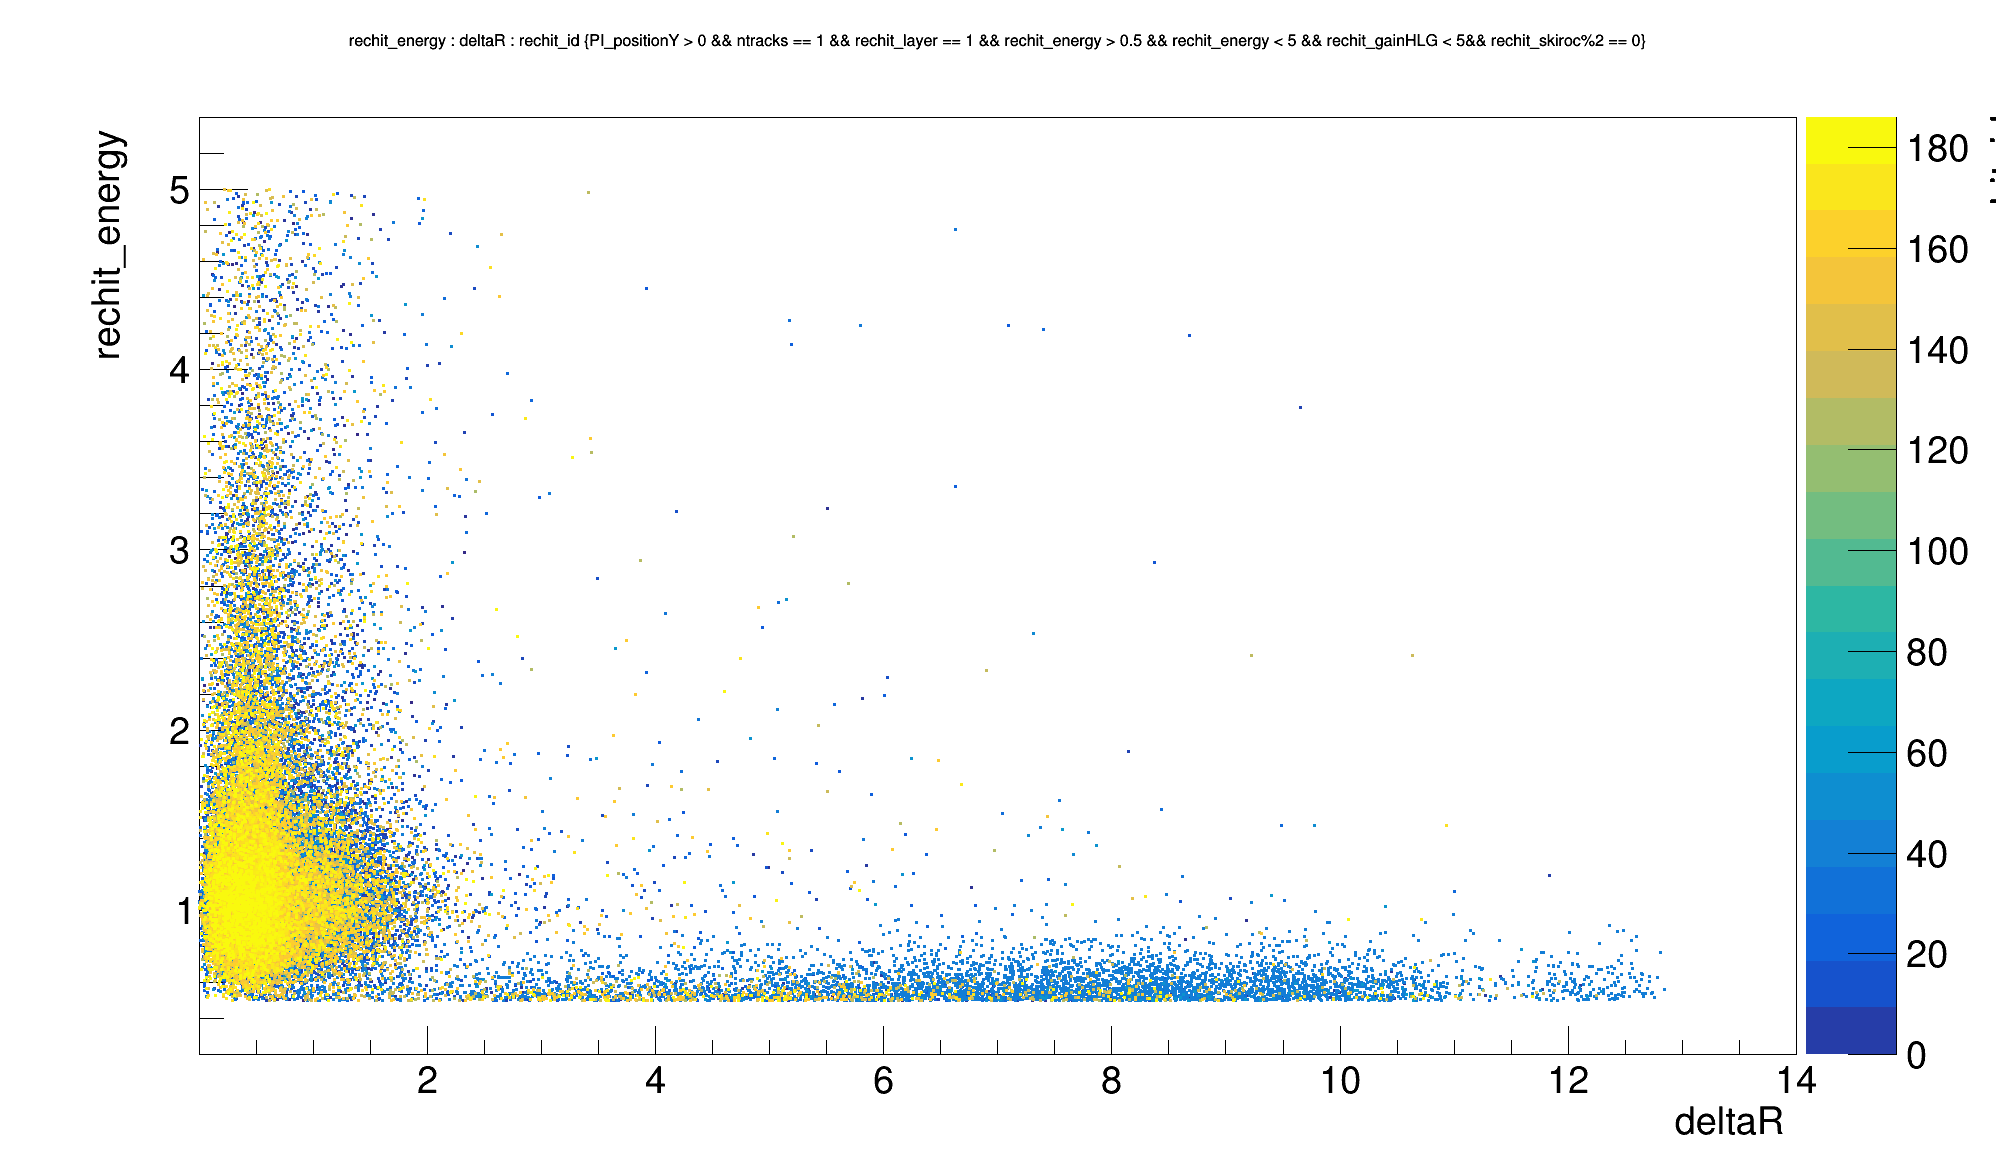

In [18]:
canv.cd()
cuts = cutstr + "&& rechit_skiroc%2 == 0"
tree.Draw("rechit_energy : deltaR : rechit_id",cuts,"pcolz");
canv.Draw()

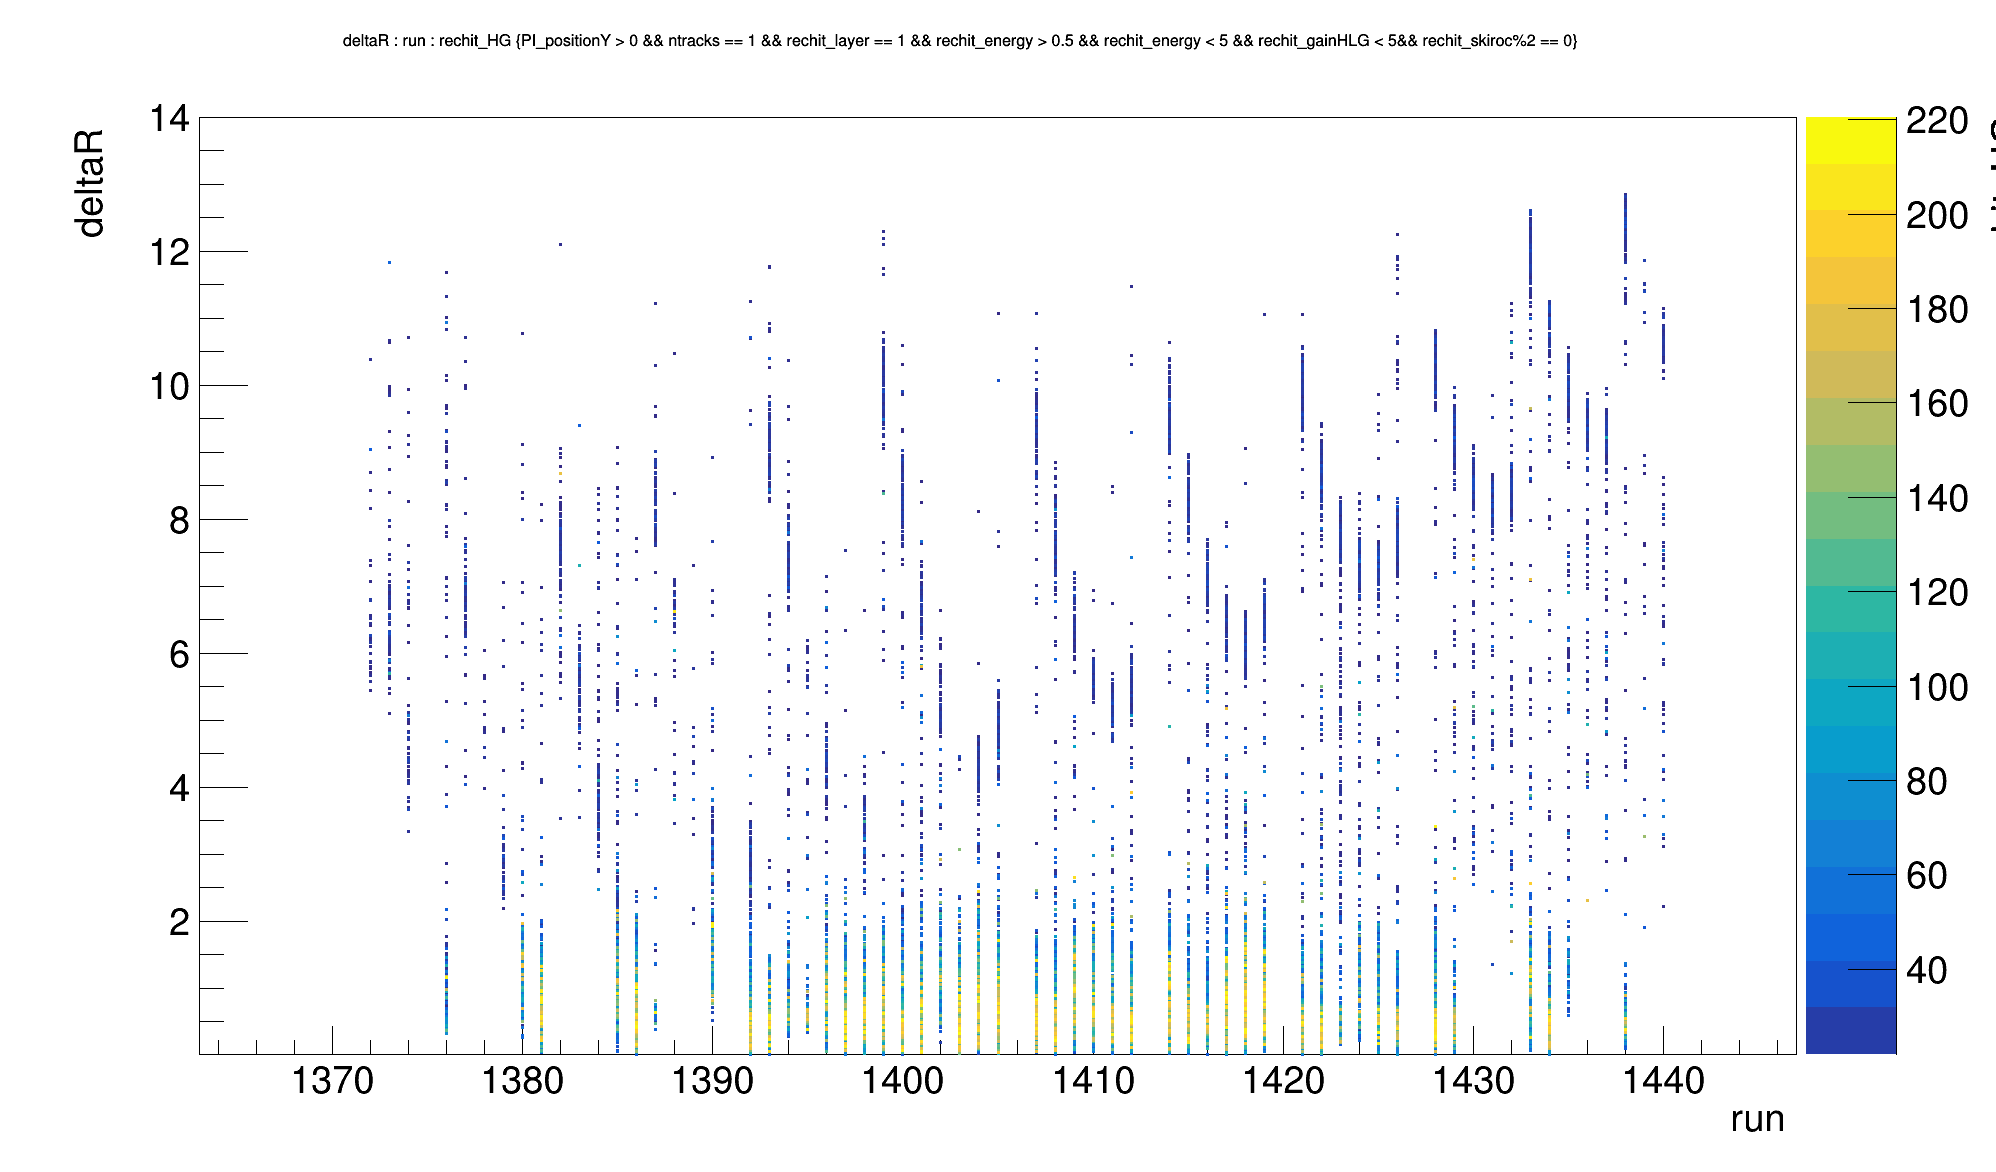

In [24]:
cuts = cutstr + "&& rechit_skiroc%2 == 0"
tree.Draw("deltaR : run : rechit_HG",cuts,"pcolz");
canv.Draw()

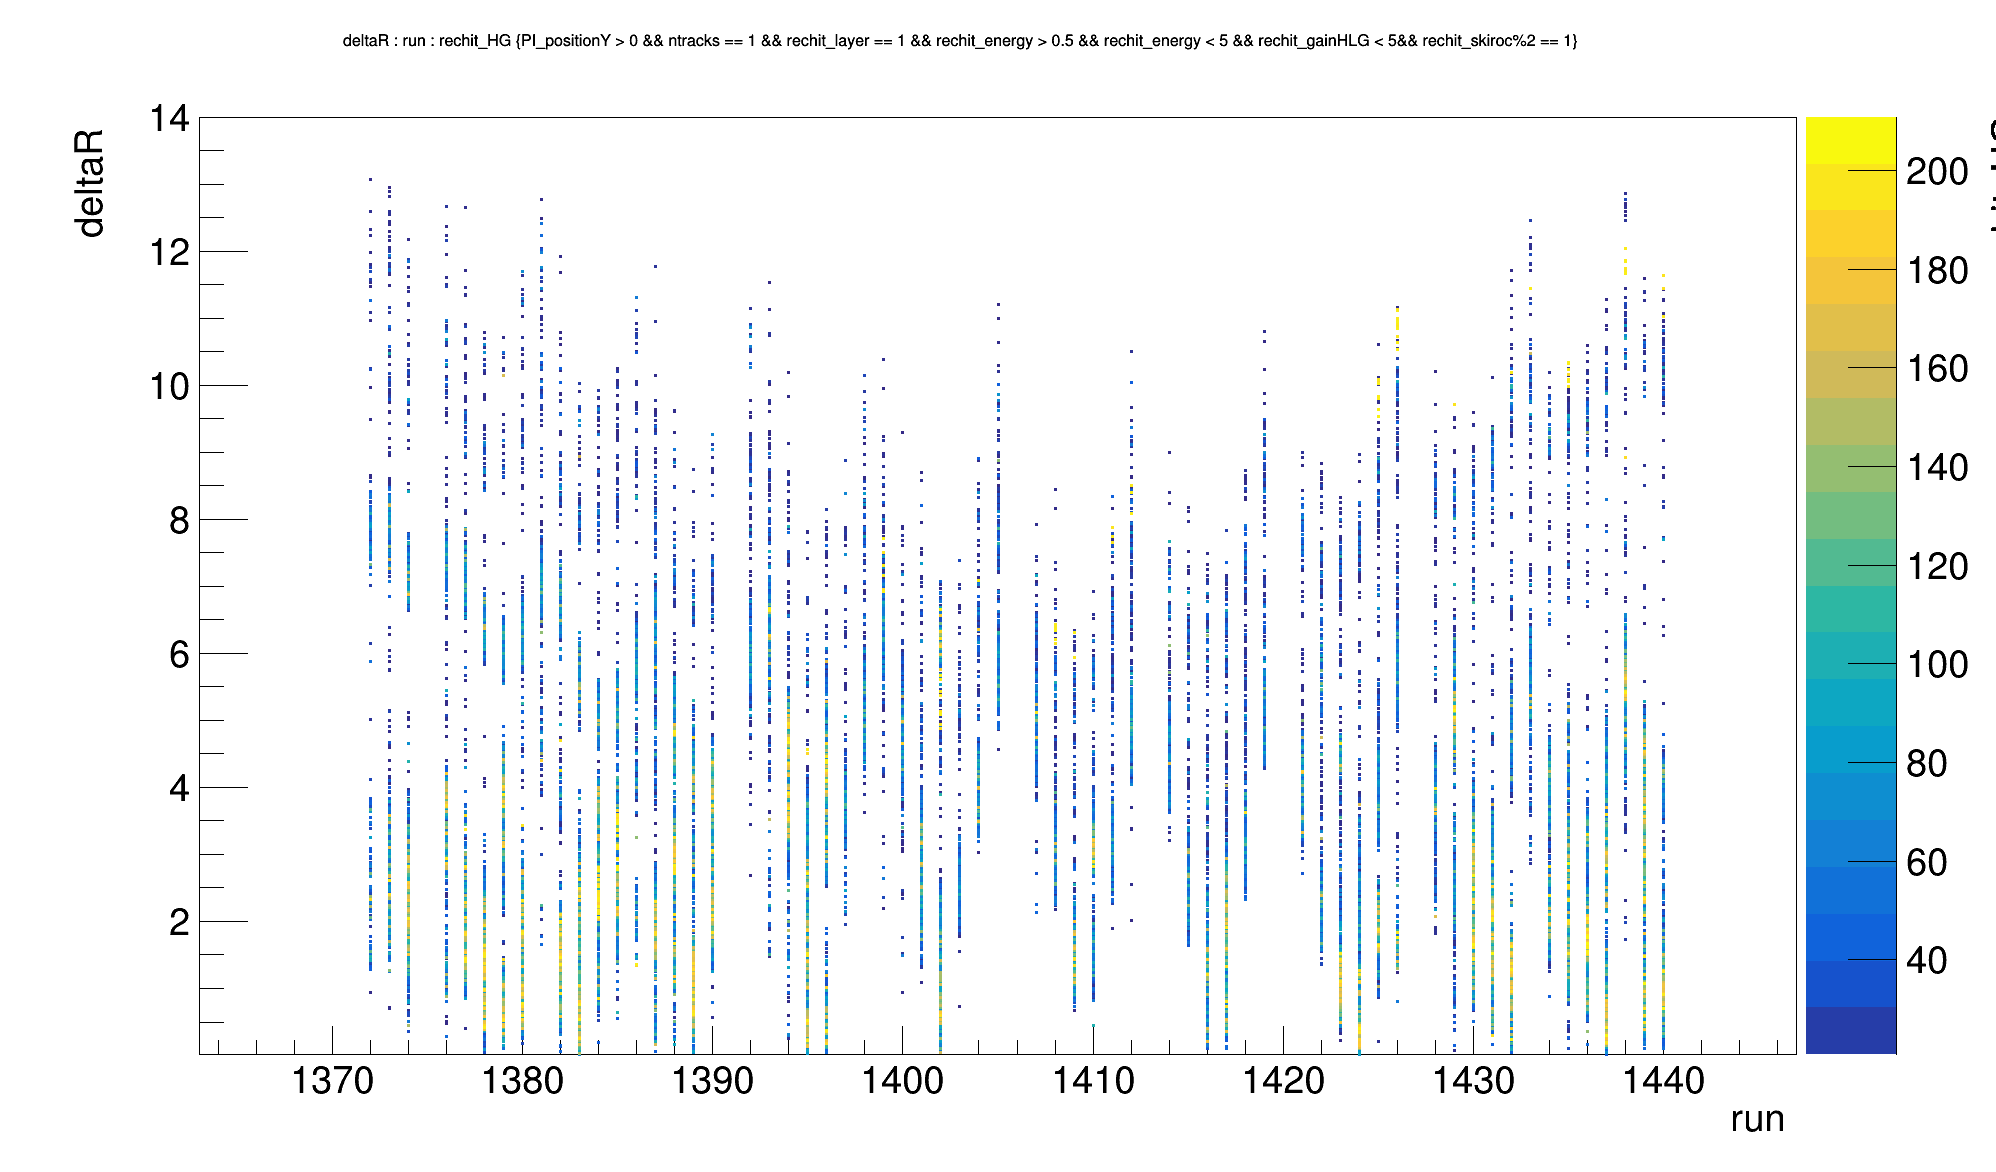

In [25]:
cuts = cutstr + "&& rechit_skiroc%2 == 1"
tree.Draw("deltaR : run : rechit_HG",cuts,"pcolz");
canv.Draw()